# <font color="red"> STATISTIQUES APPLIQUEES AUX VARIABLES REELLES</font>

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import randint
np.random.seed(1)
serie_test = np.random.randint(99, size = 1000)

## <font color="blue">Espérance</font>

Dans le cas de variables réelles, on ne pondére plus les valeurs avec leurs probabilités. Ici on aura juste la moyenne de toutes les valeurs.

In [4]:
value = [1, 5, 12, 3, 7, 9, 8, 20]
E = sum(value)/len(value)
E

8.125

## <font color="blue">Médiane, Quartiles et Mode</font>

Notation : 
* 1er quartile = Q1 (25% de l'effectif cumulé) ===> Q1 = (N+3)/4  
* 2ème quartile (Médiane) = Me (50% de l'effectif cumulé) ===> Me = (N+1)/2  
* 3ème quartile = Q3 (75% de l'effectif cumulé) ===> Q3 = (3N+1)/4  

Ces valeurs sont très importantes afin de mieux comprendre la répartition globale et vont permettre de réaliser un diagramme type boîte à moustaches

Q3 - Q1 est appelée **écart inter-quartile** qui est un critère utilisée pour la dispersion  

Le **mode** correspond à la valeur pour laquelle la densité de probabilité est la plus élevée

## <font color="blue">Variance et écart-type</font>

Dans le cas de variables réelles, la variance est la moyenne des écarts des valeurs à la moyenne. Elle est la représentation de la dispersion de notre variable.

In [5]:
V = sum(map(lambda x : (x - E)**2,value))/len(value)
σ = V**(1/2)
V,σ

(30.609375, 5.532573994082682)

In [6]:
np.std(serie_test)

28.543363484354817

**Cheat sheet**

**Moyenne** : a.mean()

**Mediane** : numpy.median()

**Ecart type** : numpy.std(), 

**Variance** : numpy.var()

**Calculer le premier décile** : numpy.percentile(serie, 10)

**Calculer la médiane autrement** : numpy.quantile(serie, 0.5) 

**Limite des quartiles** : numpy.quantile(serie, [0.25, 0.5, 0.75])

**Calculer le mode** : Utiliser counts = numpy.unique(serie, return_counts=True) couplé à np.argmax(counts)

Exemple : 

vals,counts = np.unique(serie_test, return_counts=True)
index = np.argmax(counts)
(vals[index])

Calcul de la moyenne

In [7]:
np.mean(serie_test)

48.701

Calcul des quartiles

In [8]:
np.quantile(serie_test, [0.25, 0.75])

array([25., 74.])

Calcul de la médiane

In [9]:
np.median(serie_test)

47.0

Calcul du min et du max


In [10]:
np.min(serie_test), np.max(serie_test)

(0, 98)

Détermination du mode

In [11]:
vals,counts = np.unique(serie_test, return_counts=True)
index = np.argmax(counts)
(vals[index])

32

Pandas


In [12]:
df = pd.DataFrame(serie_test)
df.describe()

,0
count,1000.000000
mean,48.701000
std,28.557646
min,0.000000
25%,25.000000
50%,47.000000
75%,74.000000
max,98.000000


## <font color="blue">Covariance et corrélation</font>

La covariance permet de pondérer les relations qui existeraient entre deux variables aléatoires(corrélation).  
Soit deux variables X et Y, la covariance de X et Y s'écrit COV(X,Y) ou σxy.  

Théoréme de König-Huygens:  
**COV(X,Y) = E(XY) - E(X).E(Y)**  
Si X et Y sont indépéndants, alors COV(X,Y) = 0  
***Attention*** La réciproque n'est pas vraie  

COV(X,X) = V(X)  
COV(X,Y) = COV(Y,X)  
COV(cX,Y) = c.COV(X,Y), c = constante  
COV(c+X,Y) = COV(X,Y), c = constante  
COV(X+Y,Z) = Cov(X,Z) + COV(Y,Z)  

Si on cherche à étudier de nombreux paramètres dans des données, on utilisera la covariance et plus précisément la corrélation afin d'estimer le lien entre deux paramètres. On stocke ces covariances dans une matrice appelée **matrice de covariance**.  
On peut estimer la corrélation par le calcul suivant:  
r = COV(X,Y)/(V(X)*V(Y))
La corrélation est comprise entre -1 et 1, on utilise donc plus souvent r^2 compris en 0 et 1.
On obtient avec cette valeur la **matrice de corrélation** que l'on peut représenter sous forme de heatmap.

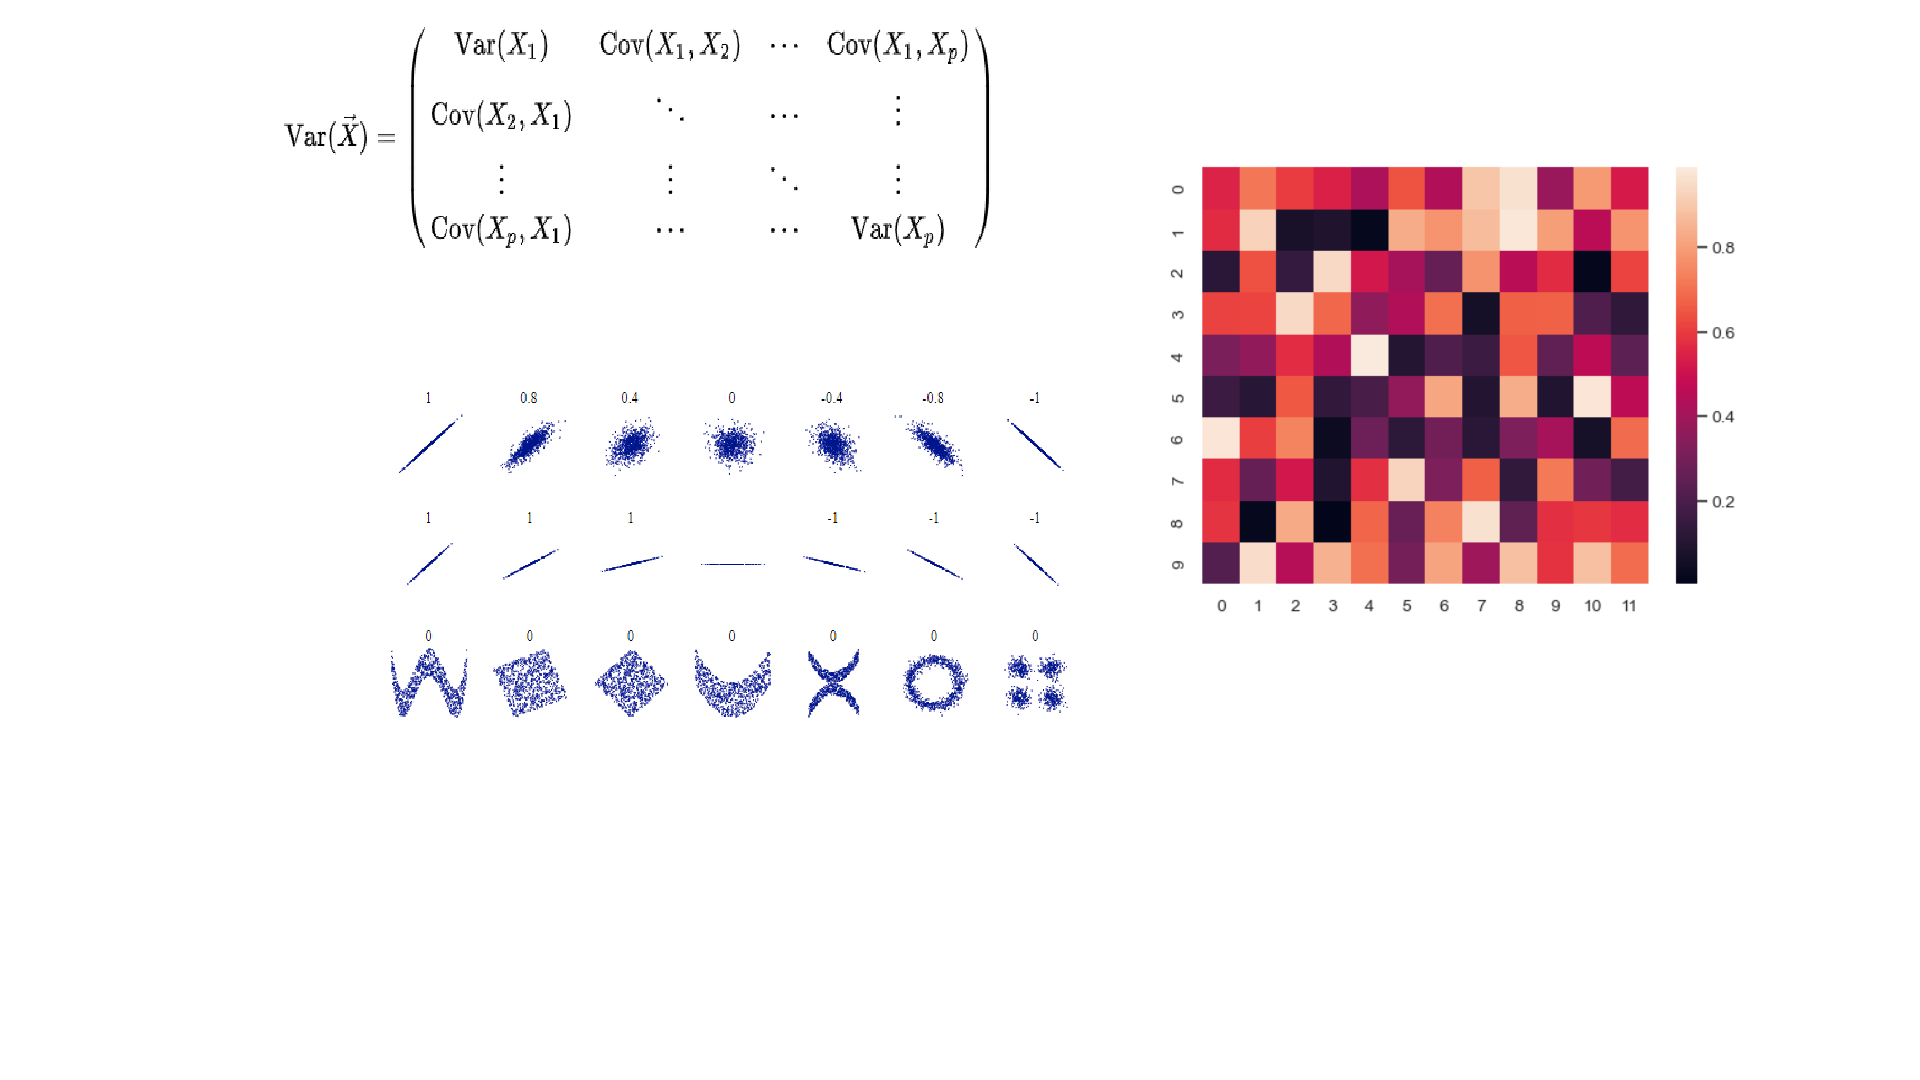

In [13]:
from PIL import Image
img = Image.open("Assets/Matrice de covariance.png")
img

Intervalle de confiance

In [14]:
from statistics import NormalDist


def confidence_interval(serie_test, confidence=0.95):
  dist = NormalDist.from_samples(serie_test)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(serie_test) - 1) ** .5)
  return dist.mean - h, dist.mean + h

confidence_interval(serie_test)

(46.93012563634969, 50.47187436365031)

Loi normale

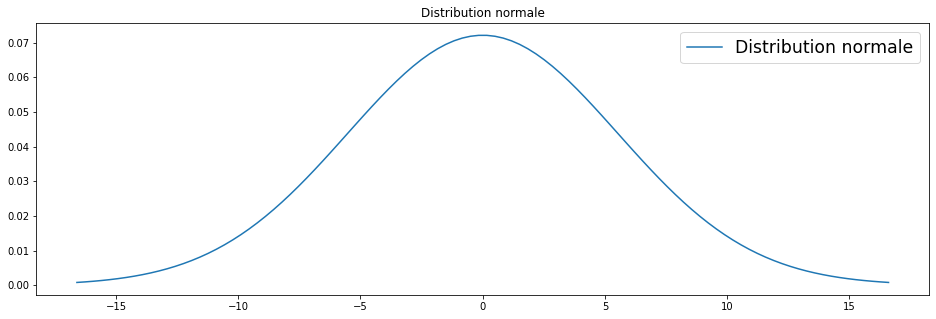

In [15]:
import scipy.stats as stats
mu = 0
variance = V
sigma = σ
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Distribution normale')
plt.title('Distribution normale')
plt.legend(fontsize='xx-large')
plt.show()

Uniform Distribution  

A Uniform distribution is pretty straightforward. Every value has an equal change of occuring. Therefore, the distribution consists of random values with no patterns in them. In this example we generate random floating numbers between 0 and 1.  

The PDF of a Uniform Distribution:

In [17]:
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)

Text(0.5, 1.0, 'Scatterplot of a Random/Uniform Distribution')

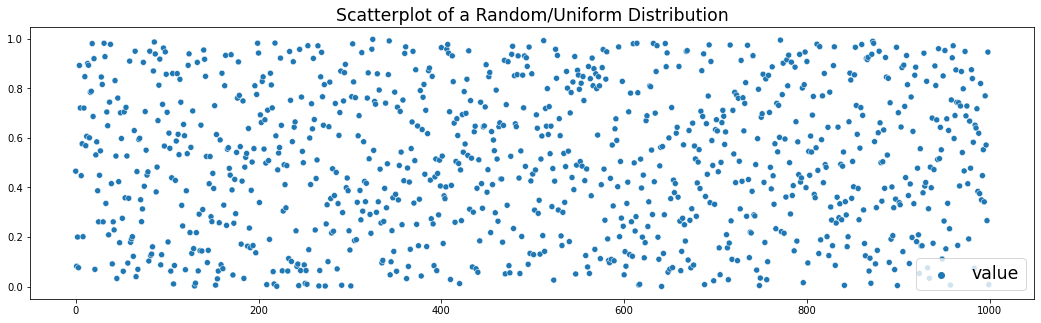

In [18]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=uniform_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Random/Uniform Distribution', fontsize='xx-large')

Pause vidéo : Le théoreme Central Limite

https://www.youtube.com/watch?v=4dhm2QAA2x4

Loi des grands nombres

cf Loi des grands nombres.ipynb